# **Predicting Boston Housing Prices using Machine Learning**

This notebook will introduce some foundation machine learning and data science concepts by exploring the problem of boston housing price prediction.

**This notebook is only intended for a practical purpose of my studies in Machine Learning as a beginner.**

## **What is regression?**

**Regression** model provides a function that describes the relationship between one or more independent variables and a response, dependent, or target variable. 

## **What we are Gonna Study?**

In this notebook we are gonna study the following topics:

* **Exploratory Data Analysis (EDA)** - the process of going through a dataset and finding out more about it.
* **Model Training** - create model(s) to learn to predict a target variable based on other variables.
* **Model Evaluation** - evaluating a models predictions using problem-specific evaluation metrics.
* **Model Comparison** - comparing several different models to find the best one.
* **Model Fine-Tuning** - once we've found a good model, how can we improve it?
* **Feature Importance** - since we're predicting the presence of heart disease, are there some things which are more important for prediction?
* **Cross-Validation** - if we do build a good model, can we be sure it will work on unseen data?
* **Reporting what we've found** - if we had to present our work, what would we show someone?



---

## **Problem Definition**

In this case study, we will analyze a descriptive dataset about different dependent values ​​of a set of features.

As the main objective, we're going to get the best prediction possible by using all the features and datas that were given to us through the following data set.

**Statement**

> Due the previously analyzed cases, what's the most probabaly value of this house?

## **Dataset Description**

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics...', Wiley, 1980.   N.B. Various transformations are used in the table on\npages 244-261 of the latter.
The Boston house-price data has been used in many machine learning papers that address regression\nproblems. 

The Boston housing prices dataset has an ethical problem. You can refer to
the documentation of this function for further details.

**The scikit-learn maintainers therefore strongly discourage the use of this
dataset unless the purpose of the code is to study and educate about
ethical issues in data science and machine learning.**

Thirteen features were measured from each each three types of wines:
* **CRIM**     
* **ZN**      
* **INDUS**    
* **CHAS**    
* **NOX**     
* **RM**       
* **AGE**      
* **DIS**      
* **RAD**      
* **TAX**      
* **PTRATIO**  
* **B**          
* **LSTAT**    
* **MEDV**    

In a regression context, this is a well-placed problem for assessing the most likely value for a selected combination of features.

### **References**   

- Belsley, Kuh & Welsch, 'Regression diagnostics: Identifying Influential Data and Sources of Collinearity', Wiley, 1980. 244-261. 

- Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann."

### **All the Directors  Reserverd**

**Creator:**  Harrison, D. and Rubinfeld, D.L.

**This is a copy of UCI ML housing dataset.   
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/**

**This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.**

---

### **Dataset Characteristics**

```
- CRIM     Per capita crime rate by town        
- ZN       Proportion of residential land zoned for lots over 25,000 sq.ft.       
- INDUS    Proportion of non-retail business acres per town        
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)        
- NOX      Nitric oxides concentration (parts per 10 million)        
- RM       Average number of rooms per dwelling  
- AGE      Proportion of owner-occupied units built prior to 1940       
- DIS      Weighted distances to five Boston employment centres       
- RAD      Index of accessibility to radial highways        
- TAX      Full-value property-tax rate per $10,000       
- PTRATIO  Pupil-teacher ratio by town       
- B        1000(Bk - 0.63)^2 where Bk is the proportion of black people by town       
- LSTAT    % lower status of the population        
- MEDV     Median value of owner-occupied homes in $1000's  
```

> **Dimensionality: (506 , 13)**

> **The summary statics that contains all the parameters will be showed as the notebook follows.**

---
## **What is a Feature in Machine Learning?**

In machine learning and pattern recognition, a feature is an individual measurable property or characteristic of a phenomenon. Choosing informative, discriminating and independent features is a crucial element of effective algorithms in pattern recognition, classification and regression.

## **Evaluation**

Using differents types od models we are gonna try to evaluate the dataset of boston housing datas.

Originally used as an example data set on which Fisher's linear discriminant analysis was applied, it became a typical test case for many statistical classification techniques in machine learning such as support vector machines.

**In this project we will use this case for studies and learning purposes.**

## **Legend**

**CHAS (Charles River Dummy):** 
* **1 if tract bounds river** 
* **0 otherwise**  

## **Dataset**

The dataset contains a set of 506 records under 13 features.

You can find the original data set in the Machine Learning package Scikit - Learn page.

---

In [283]:
# Regular EDA and Plotting Libraries
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

# Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

In [ ]:
# load the boston dataset
from sklearn.datasets import load_boston
load_boston = load_boston()

In [3]:
def dataframe():
  data = load_boston.data
  features_names = load_boston.feature_names
  target = load_boston.target

  boston = pd.DataFrame(data, columns = features_names)
  boston['MEDV'] = target

  return boston

In [4]:
## creating boston dataframe
boston = dataframe()

In [5]:
# checking the first 10 rows in the data set
boston.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [6]:
# Generate descriptive statistics. 
boston_describe = boston.describe()
boston_describe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
# Checking for any Missing / NaN values
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


---

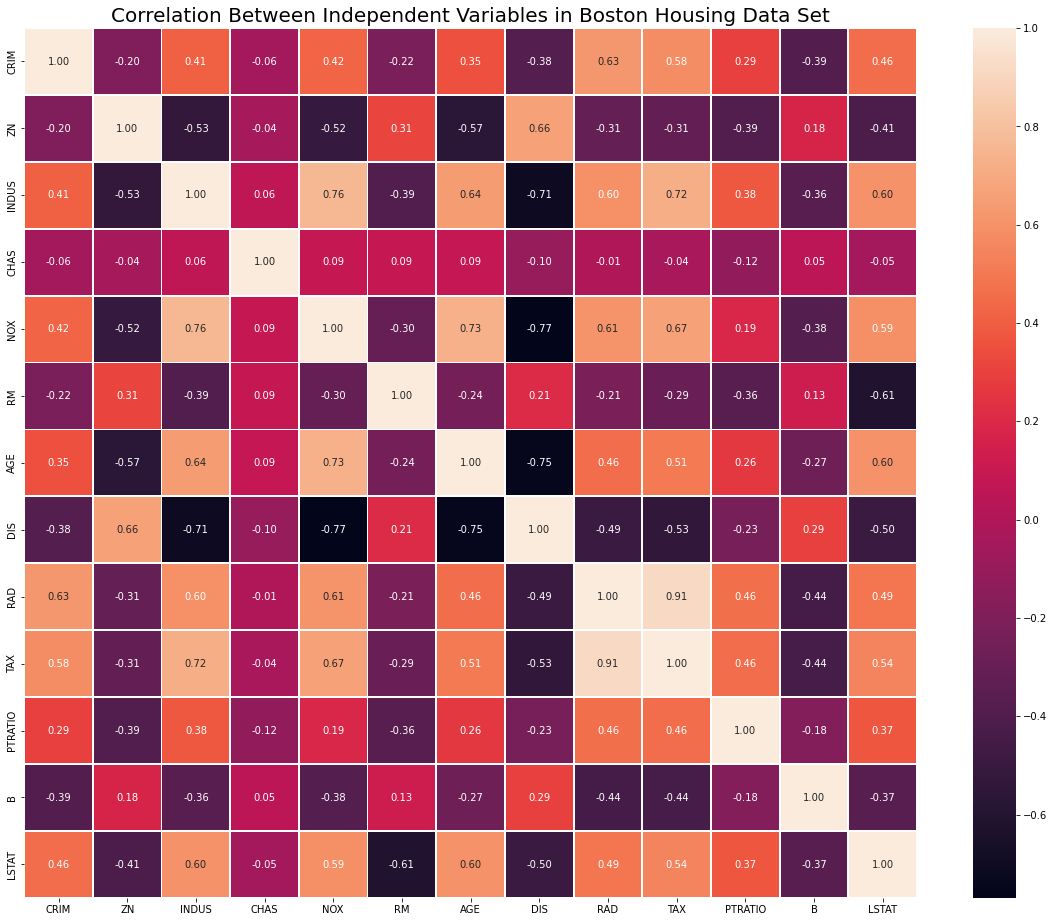

In [ ]:
# Correlation between independent variables
'''
This may give an idea of which independent variables may or may not have an impact on our target variable.
'''
corr_matrix = boston.drop(['MEDV'], axis = 1).corr()
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True,  linewidths=0.8, fmt= ".2f");
plt.title('Correlation Between Independent Variables in Boston Housing Data Set', fontsize=20);

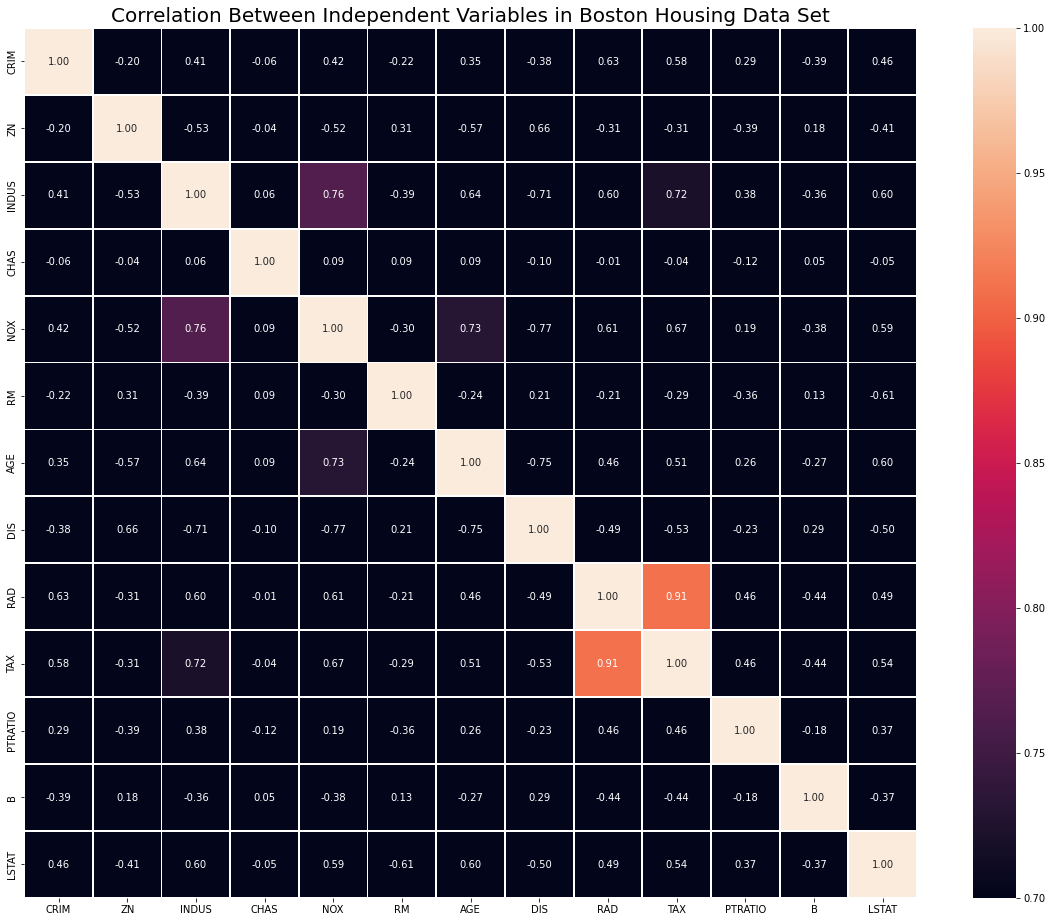

In [ ]:
# checking the correlated independent variables wich values is higher than 0.7
corr_matrix = boston.drop(['MEDV'], axis = 1).corr()
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True,  linewidths=0.8, fmt= ".2f", vmin = 0.7);
plt.title('Correlation Between Independent Variables in Boston Housing Data Set', fontsize=20);

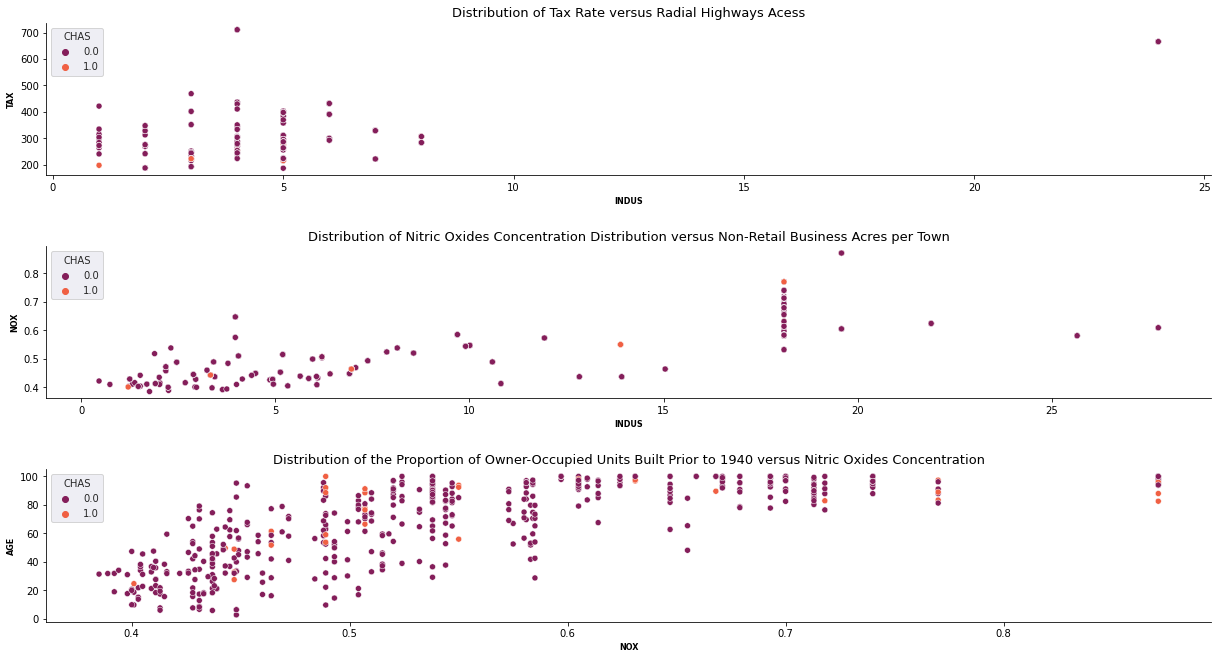

In [8]:
# scatterplots about the correlation between independent variables showed in the previously heatmap
fig, axs = plt.subplots(nrows = 3, figsize = (18,10))
fig.tight_layout(pad=5.0)

# checking tax rate and radial highway correlation distribution
sns.scatterplot(data = boston, x = 'RAD', y = 'TAX', hue = 'CHAS', palette = 'rocket', ax = axs[0]);
axs[0].set_title('Distribution of Tax Rate versus Radial Highways Acess', fontsize = 13);

# checking indus and nox correlation distribution
sns.scatterplot(data = boston, x = 'INDUS', y = 'NOX', hue = 'CHAS', palette = 'rocket', ax = axs[1]);
axs[1].set_title('Distribution of Nitric Oxides Concentration Distribution versus Non-Retail Business Acres per Town', fontsize = 13);

# checking the  age and nox correlation distribution
sns.scatterplot(data = boston, x = 'NOX', y = 'AGE', hue = 'CHAS', palette = 'rocket', ax = axs[2]);
axs[2].set_title('Distribution of the Proportion of Owner-Occupied Units Built Prior to 1940 versus Nitric Oxides Concentration', fontsize = 13);

# styles and configurations
sns.set_style("dark")

labels = ['INDUS', 'TAX', 'INDUS', 'NOX', 'NOX', 'AGE']
labels_index = 0

for row in range(3):
  sns.despine(ax = axs[row])
  axs[row].set_xlabel(labels[labels_index],fontsize = 8, weight = 'bold')
  axs[row].set_ylabel(labels[labels_index + 1],fontsize = 8, weight = 'bold')
  axs[row].legend(title = 'CHAS', loc = 'upper left');
  labels_index += 2

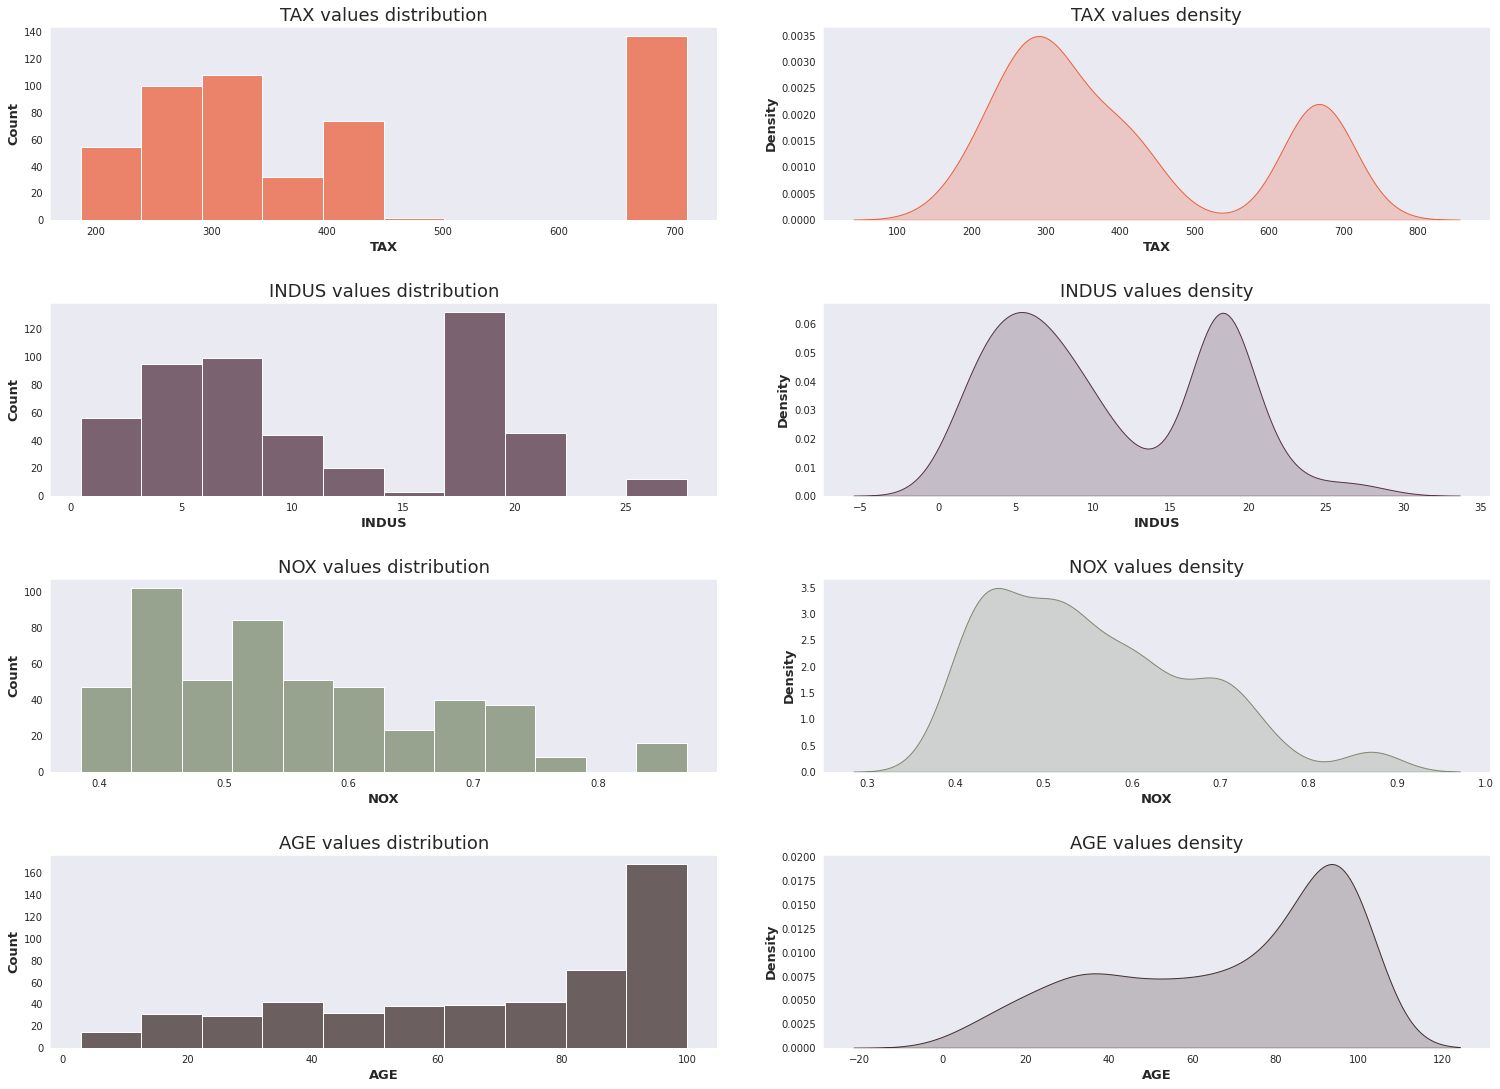

In [9]:
# checking how TAX, INDUX, NOX and AGE features are distributed in the data set 

fig, axs = plt.subplots(nrows = 4, ncols = 2, figsize = (22,16))

sns.histplot(data = boston, x = 'TAX', color = '#eb613b', ax = axs[0][0])
sns.kdeplot(data = boston, x = 'TAX', color = '#eb613b', shade = True, ax = axs[0][1]);

sns.histplot(data = boston, x = 'INDUS', color = '#563444', ax = axs[1][0])
sns.kdeplot(data = boston, x = 'INDUS', color = '#563444', shade = True, ax = axs[1][1])

sns.histplot(data = boston, x = 'NOX', color = '#7c8a6e', ax = axs[2][0])
sns.kdeplot(data = boston, x = 'NOX', color = '#7c8a6e', shade = True, ax = axs[2][1])

sns.histplot(data = boston, x = 'AGE', color = '#42302e', ax = axs[3][0])
sns.kdeplot(data = boston, x = 'AGE', color = '#42302e', shade = True, ax = axs[3][1])

# styles and configurations
sns.set_style('dark')
fig.tight_layout(pad = 5.0)

labels = ['TAX', 'INDUS','NOX','AGE']
labels_index = 0

for row in range(4):
  for col in range(2):
    ylabel_text = 'Count' if not col else 'Density'
    title_text = 'distribution' if not col else 'density'
    axs[row][col].set_title(f"{labels[labels_index]} values {title_text}", fontsize = 18)
    axs[row][col].set_xlabel(labels[labels_index], fontsize = 13, weight = 'bold')
    axs[row][col].set_ylabel(ylabel_text, fontsize = 13, weight = 'bold')
  labels_index += 1

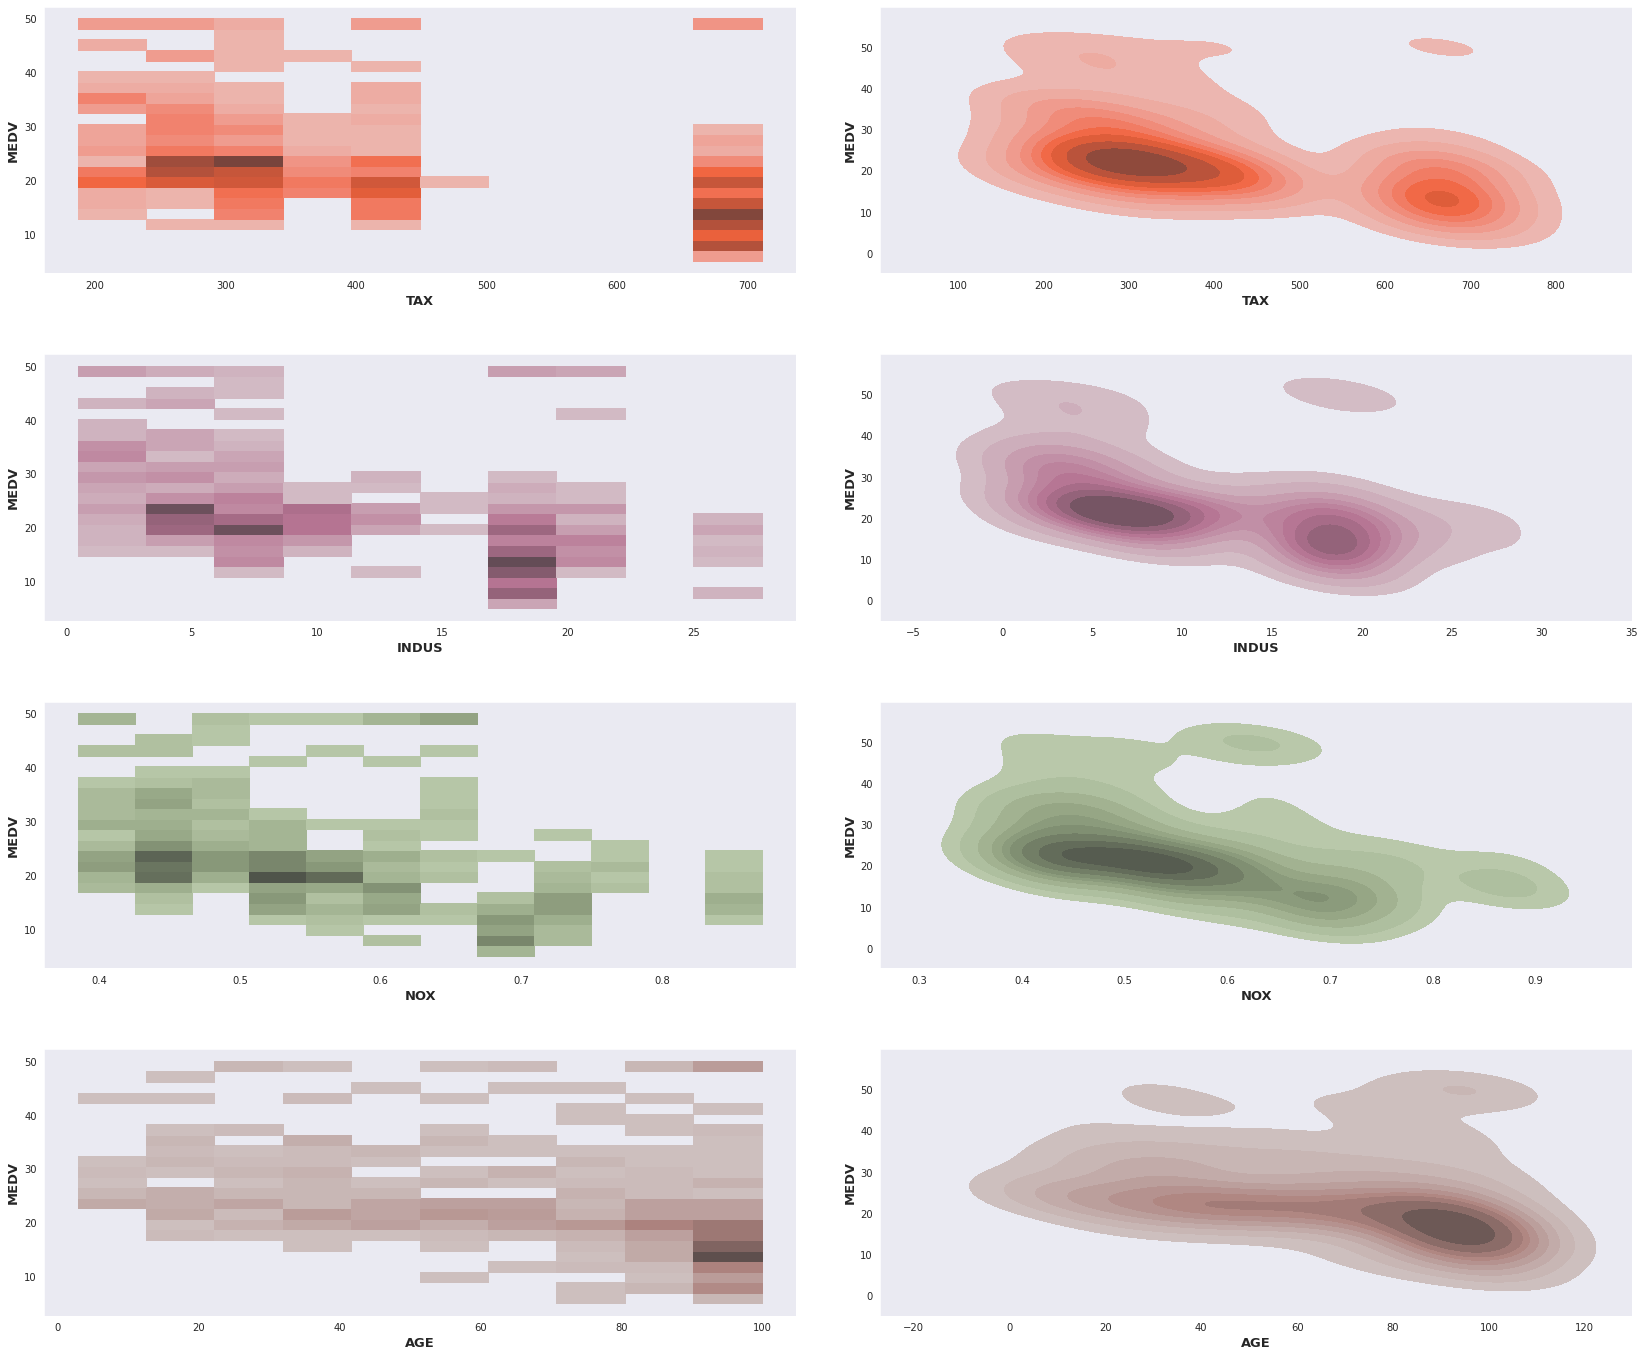

In [10]:
# checking TAX, INDUX, NOX and AGE correlation with MEDV
fig, axs = plt.subplots(nrows = 4, ncols = 2, figsize = (24,20));

sns.histplot(data = boston, x = 'TAX', y = 'MEDV',  color = '#eb613b', ax = axs[0][0])
sns.kdeplot(data = boston, x = 'TAX',  y = 'MEDV',color = '#eb613b', shade = True, ax = axs[0][1]);

sns.histplot(data = boston, x = 'INDUS',  y = 'MEDV',color = '#563444', ax = axs[1][0])
sns.kdeplot(data = boston, x = 'INDUS',  y = 'MEDV',color = '#563444', shade = True, ax = axs[1][1])

sns.histplot(data = boston, x = 'NOX',  y = 'MEDV',color = '#7c8a6e', ax = axs[2][0])
sns.kdeplot(data = boston, x = 'NOX',  y = 'MEDV',color = '#7c8a6e', shade = True, ax = axs[2][1])

sns.histplot(data = boston, x = 'AGE', y = 'MEDV', color = '#42302e', ax = axs[3][0])
sns.kdeplot(data = boston, x = 'AGE',  y = 'MEDV',color = '#42302e', shade = True, ax = axs[3][1])

# styles and configurations
labels = ['TAX', 'INDUS','NOX','AGE']
labels_index = 0
fig.tight_layout(pad = 5.0)

for row in range(4):
  for col in range(2):
    ylabel_text = 'MEDV'
    axs[row][col].set_xlabel(labels[labels_index], fontsize = 13, weight = 'bold')
    axs[row][col].set_ylabel(ylabel_text, fontsize = 13, weight = 'bold')
  labels_index += 1

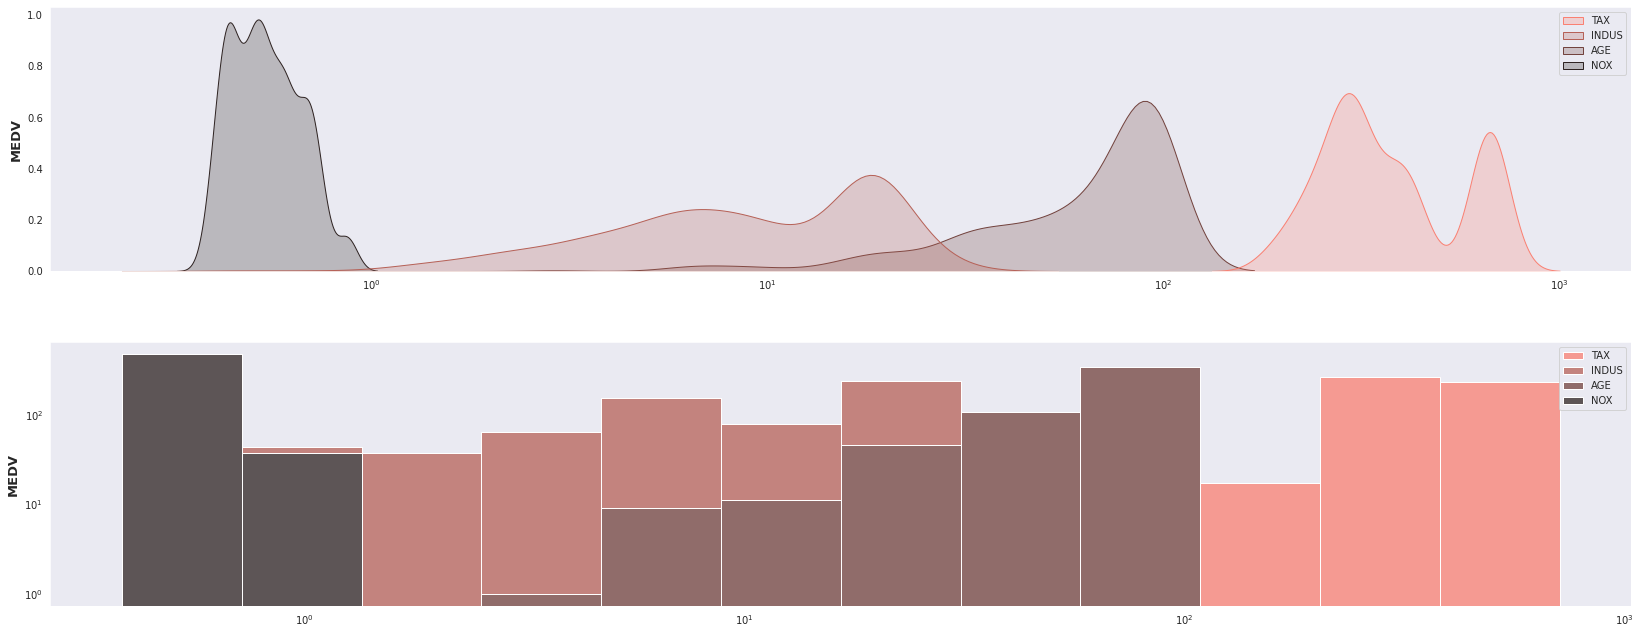

In [11]:
# comparing all selected features in a single graph
variables = [boston['TAX'], boston['INDUS'], boston['AGE'], boston['NOX']]
fig, axs = plt.subplots(nrows = 2 ,figsize = (24,10))

# x label in log scale
sns.kdeplot(data = variables, shade = True, log_scale = (True, False), palette = 'dark:salmon_r',ax = axs[0])

# x and y labels in log scale
sns.histplot(data = variables,log_scale = (True, True), multiple = 'stack', palette = 'dark:salmon_r', ax = axs[1]);

for row in range(2):
    axs[row].set_ylabel(ylabel_text, fontsize = 13, weight = 'bold')

fig.tight_layout(pad = 5.0)
# style
sns.set_style('darkgrid')

In [318]:
import matplotlib.gridspec as gridspec

class SeabornFig2Grid():

    def __init__(self, seaborngrid, fig,  subplot_spec):
        self.fig = fig
        self.sg = seaborngrid
        self.subplot = subplot_spec
        if isinstance(self.sg, sns.axisgrid.FacetGrid) or \
            isinstance(self.sg, sns.axisgrid.PairGrid):
            self._movegrid()
        elif isinstance(self.sg, sns.axisgrid.JointGrid):
            self._movejointgrid()
        self._finalize()

    def _movegrid(self):
        """ Move PairGrid or Facetgrid """
        self._resize()
        n = self.sg.axes.shape[0]
        m = self.sg.axes.shape[1]
        self.subgrid = gridspec.GridSpecFromSubplotSpec(n,m, subplot_spec=self.subplot)
        for i in range(n):
            for j in range(m):
                self._moveaxes(self.sg.axes[i,j], self.subgrid[i,j])

    def _movejointgrid(self):
        """ Move Jointgrid """
        h= self.sg.ax_joint.get_position().height
        h2= self.sg.ax_marg_x.get_position().height
        r = int(np.round(h/h2))
        self._resize()
        self.subgrid = gridspec.GridSpecFromSubplotSpec(r+1,r+1, subplot_spec=self.subplot)

        self._moveaxes(self.sg.ax_joint, self.subgrid[1:, :-1])
        self._moveaxes(self.sg.ax_marg_x, self.subgrid[0, :-1])
        self._moveaxes(self.sg.ax_marg_y, self.subgrid[1:, -1])

    def _moveaxes(self, ax, gs):
        ax.remove()
        ax.figure=self.fig
        self.fig.axes.append(ax)
        self.fig.add_axes(ax)
        ax._subplotspec = gs
        ax.set_position(gs.get_position(self.fig))
        ax.set_subplotspec(gs)

    def _finalize(self):
        plt.close(self.sg.fig)
        self.fig.canvas.mpl_connect("resize_event", self._resize)
        self.fig.canvas.draw()

    def _resize(self, evt=None):
        self.sg.fig.set_size_inches(self.fig.get_size_inches())

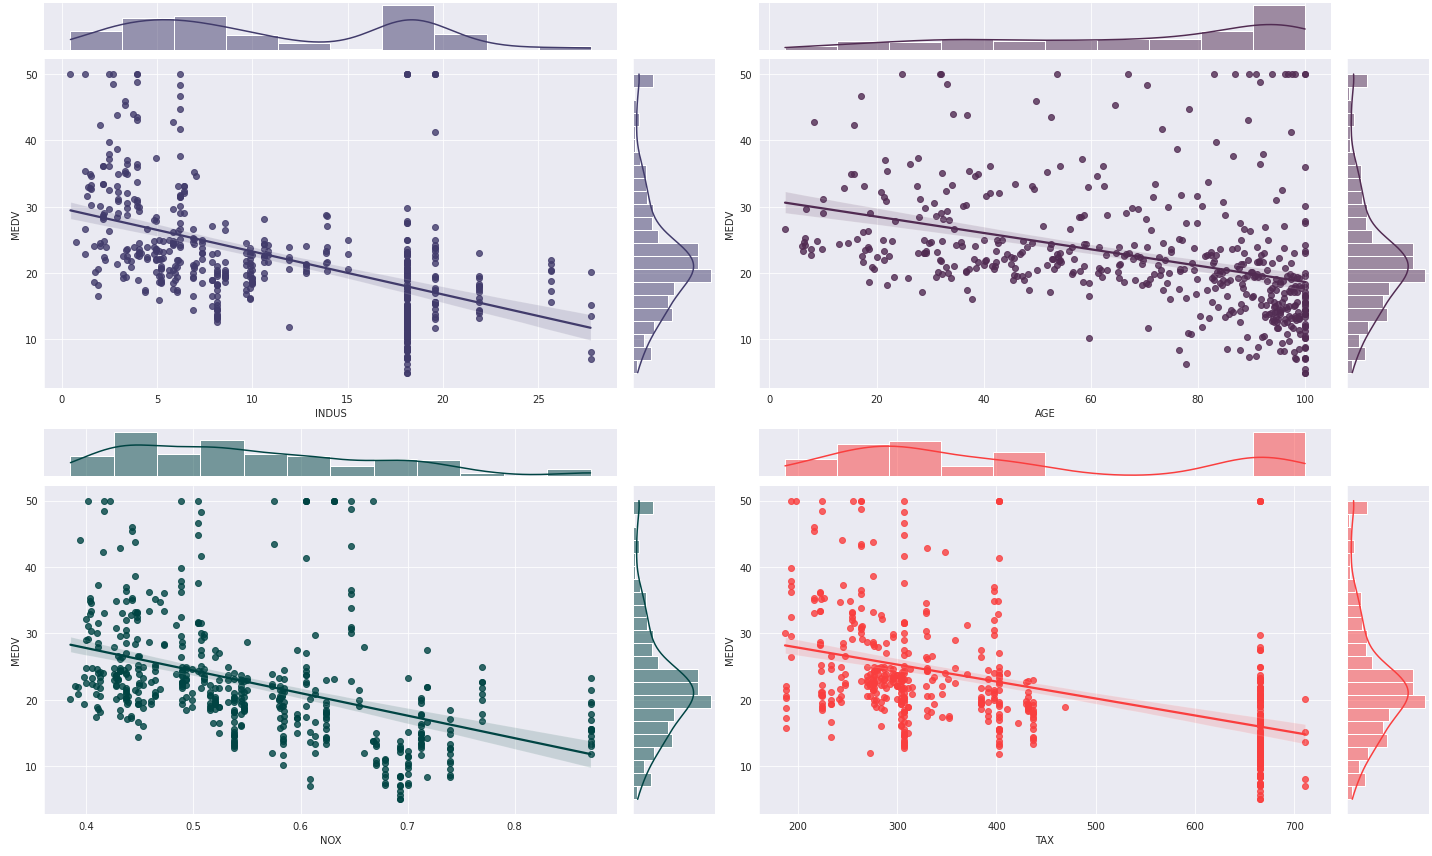

In [337]:
# checking the linear regression of each selected feature according MEDV values
g0 = sns.JointGrid(x="INDUS", y="MEDV", data=boston)
g0.plot_joint(sns.regplot, color = '#413b6b')
g0.plot_marginals(sns.histplot, kde=True, color='#413b6b')

g1 = sns.JointGrid(x="AGE", y="MEDV", data=boston)
g1.plot_joint(sns.regplot, color = '#512b52')
g1.plot_marginals(sns.histplot, kde=True, color='#512b52')

g2 = sns.JointGrid(x="NOX", y="MEDV", data=boston)
g2.plot_joint(sns.regplot,   color = '#004443')
g2.plot_marginals(sns.histplot, kde=True, color='#004443')

g3 = sns.JointGrid(x="TAX", y="MEDV", data=boston)
g3.plot_joint(sns.regplot, color = '#fa3e3e')
g3.plot_marginals(sns.histplot, kde=True, color='#fa3e3e')


fig = plt.figure(figsize=(20,12))
gs = gridspec.GridSpec(2, 2)

mg0 = SeabornFig2Grid(g0, fig, gs[0])
mg1 = SeabornFig2Grid(g1, fig, gs[1])

mg2 = SeabornFig2Grid(g2, fig, gs[2])
mg3 = SeabornFig2Grid(g3, fig, gs[3])

gs.tight_layout(fig)

---

## **Spliting Data and Fiting Models**

In [235]:
# Split data into training and validation sets
X = boston.drop(['MEDV'], axis = 1)
y = boston['MEDV']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((404, 13), (102, 13), (404,), (102,))

In [250]:
# Put models in a dictionary
models = {"RandomForestRegressor": RandomForestRegressor(),
          "Linear Regression": LinearRegression(),
          "Logistic Regression": Ridge(), 
          "Lasso": Lasso()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_valid, y_train, y_valid):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_valid : validation data
    y_train : labels assosciated with training data
    y_valid : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(0)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_valid, y_valid)
    return model_scores

In [251]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_valid=X_valid,
                             y_train=y_train,
                             y_valid=y_valid)
model_scores

{'RandomForestRegressor': 0.8439249669445507,
 'Linear Regression': 0.5891224244534052,
 'Logistic Regression': 0.5819901242836669,
 'Lasso': 0.5716299355452358}

---

## **Model Comparison**

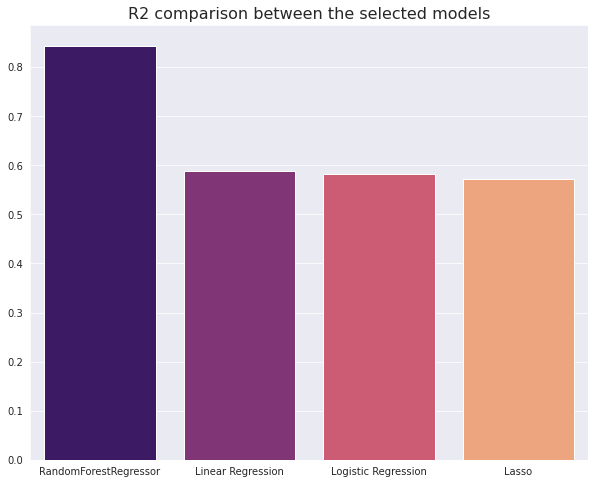

In [252]:
model_compare = pd.DataFrame(model_scores, index = ['R2'])

# simple bar graph comparison
plt.figure(figsize = (10,8))
sns.barplot(data = model_compare, palette = 'magma');
plt.title('R2 comparison between the selected models', fontsize = 16);

---

## **Hyperparameter Tuning and Cross-Validation**

For practical cases we could simple the best model with the better **R2** performance, but let's modify some **Hyperparameter** from all the models and see the results.

**Note: This is only a study case, so we don't need a perfect model using all HyperParameters.**

### **Changing Hyperparameters using `GridSearchCV`**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# RandomForestRegressor hyperparameters grid
rfr_grid = {"max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"]}

In [ ]:
# Setup random seed
np.random.seed(0)

# Setup grid hyperparameter search for RandomForestRegressor
gs_rfr = GridSearchCV(RandomForestRegressor(),
                          param_grid=rfr_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_rfr.fit(X_train, y_train);

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


In [ ]:
# Check the best parameters
gs_rfr.best_params_

{'max_depth': None,
 'max_features': 0.5,
 'min_samples_leaf': 1,
 'min_samples_split': 6}

### **Changing Hyperparameters using `RandomizedSearchCV`**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Setup random seed
np.random.seed(0)

# Setup grid hyperparameter search for RandomForestRegressor
rs_rfr = RandomizedSearchCV(RandomForestRegressor(),
                          param_distributions = rfr_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
rs_rfr.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
# Check the best parameters
rs_rfr.best_params_

{'min_samples_split': 12,
 'min_samples_leaf': 3,
 'max_features': 0.5,
 'max_depth': 10}

### **Changing Hyperparameters using `HalvingGridSearchCV`**

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [ ]:
# Setup random seed
np.random.seed(0)

# Setup grid hyperparameter search for RandomForestRegressor
hs_rfr = HalvingGridSearchCV(RandomForestRegressor(),
                          param_grid = rfr_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
hs_rfr.fit(X_train, y_train);

In [ ]:
# Check the best parameters
hs_rfr.best_params_

{'max_depth': None,
 'max_features': 0.5,
 'min_samples_leaf': 1,
 'min_samples_split': 4}

## **Evaluating a Regression Model**

Evaluations parameters:

* **MSLE (mean squared log error)**
* **MAE (mean absolute error)**
* **RMSLE (root mean squared log error)**

In [253]:
def rmsle(y_valid, y_preds):
    return np.sqrt(mean_squared_log_error(y_valid, y_preds))

# Create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"MAE": mean_absolute_error(y_valid, val_preds),
              "RMSLE": rmsle(y_valid, val_preds),
              "R^2": model.score(X_valid, y_valid)}
    return scores

In [254]:
# creating
gs_rfr = RandomForestRegressor(max_depth = None, max_features = 0.5, min_samples_leaf =  1, min_samples_split = 6)
gs_rfr.fit(X_train, y_train);

In [255]:
# evaluating the RandomForestRegressor model with GridSearchCV hyperparameters
gs_rfr_scores = show_scores(gs_rfr)
gs_rfr_scores

{'MAE': 2.609330795862154,
 'RMSLE': 0.1451396524130591,
 'R^2': 0.8347021384656639}

In [256]:
rs_rfr = RandomForestRegressor(max_depth = 10, max_features = 0.5, min_samples_leaf =  3, min_samples_split = 12)
rs_rfr.fit(X_train, y_train);

In [257]:
# evaluating the RandomForestRegressor model with RandomizedSearchCV hyperparameters
rs_rfr_scores = show_scores(rs_rfr)
rs_rfr_scores

{'MAE': 2.7274349953396233,
 'RMSLE': 0.16559074308556282,
 'R^2': 0.7843258497703574}

In [258]:
hs_rfr = RandomForestRegressor(max_depth = None, max_features = 0.5, min_samples_leaf =  1, min_samples_split = 4)
hs_rfr.fit(X_train, y_train);

In [259]:
# evaluating the RandomForestRegressor model with HalvingGridSearchCV hyperparameters
hs_rfr_scores = show_scores(hs_rfr)
hs_rfr_scores

{'MAE': 2.6079025383385672,
 'RMSLE': 0.14671100585054384,
 'R^2': 0.8265799305856235}

In [260]:
metrics = pd.DataFrame([gs_rfr_scores, rs_rfr_scores, hs_rfr_scores])
metrics['method'] = ['GridSearchCV', 'RandomizedSearchCV', 'HalvingGridSearchCV']

In [261]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.3f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.3f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

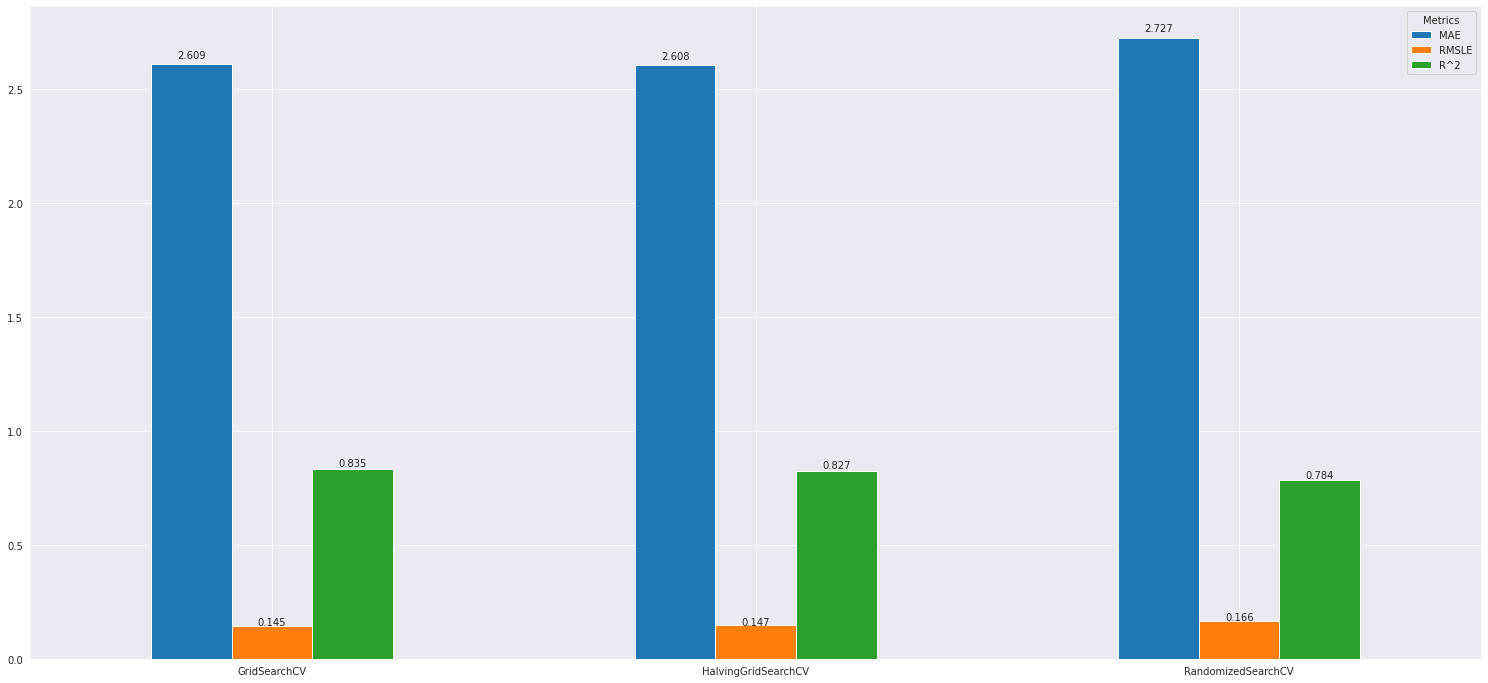

In [262]:
df_pivot = pd.pivot_table(
	metrics,
	values= ['MAE', 'RMSLE', 'R^2'],
	index= 'method',
	aggfunc=np.mean
)

# Plot a bar chart using the DF
ax = df_pivot.plot.bar()
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(26, 12)
# Change the axes labels
ax.set_xlabel("")
ax.tick_params(axis='x', rotation= 360)
ax.legend(title = 'Metrics');
show_values(ax)

---

## **Classification Report**

* **Negative MAE**
* **Negative MSE**
* **Negative MRMSE** 
* **Negative MSLE**
* **Negative MAPE**
* **R2**

### **Classification Report using `scoring` Method**


In [263]:
from sklearn.model_selection import cross_val_score

In [232]:
def neg_scoring_classification_report(model):
  nmae = np.mean(cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error"))
  nmse  = np.mean(cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error"))
  nrmse   = np.mean(cross_val_score(model, X, y, cv=5, scoring="neg_root_mean_squared_error"))
  nmsle   = np.mean(cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_log_error"))
  nmape   = np.mean(cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_percentage_error"))
  r2   = np.mean(cross_val_score(model, X, y, cv=5, scoring="r2"))

  cv_report = pd.DataFrame({'Neg. MAE': nmae, 
                            'Neg. MSE': nmse,
                            'Neg. MRMSE': nrmse, 
                            'Neg. MSLE': nmsle,
                            'Neg. MAPE': nmape,
                            'R2': r2}, index = [0])

  return cv_report

In [265]:
# creating a RandomForestRegressor model using the hyperparameter listed by GridSearchCV
rfr = RandomForestRegressor(max_depth = None, max_features = 0.5, min_samples_leaf = 1, min_samples_split = 2)

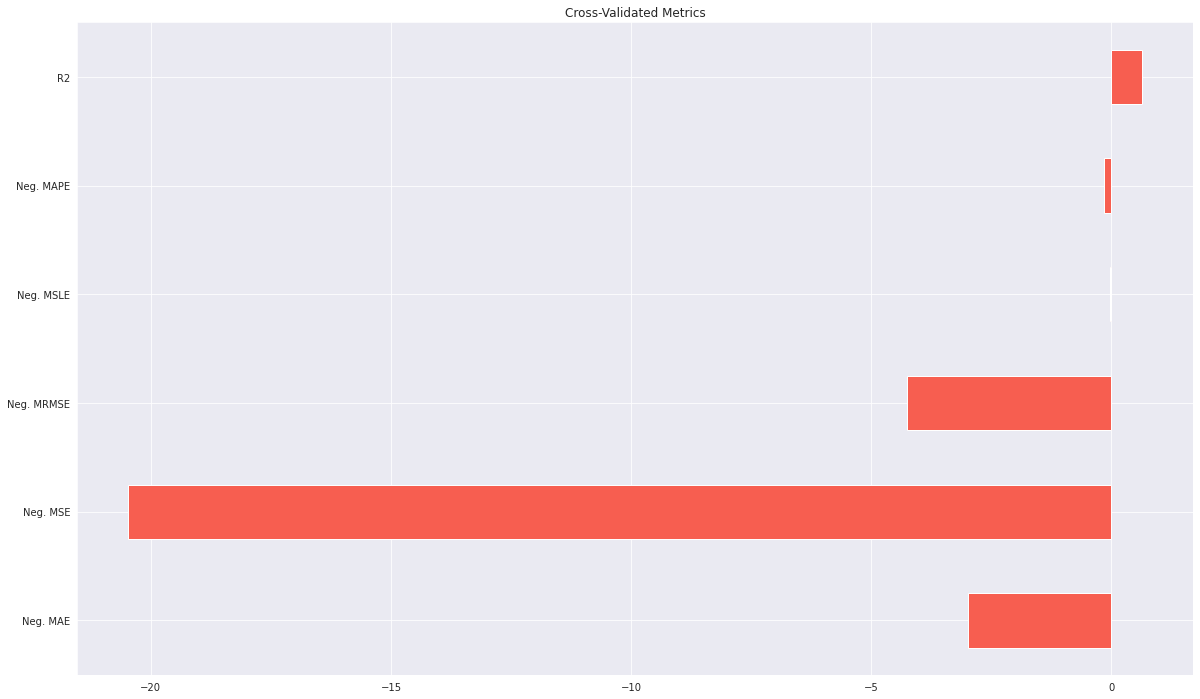

In [279]:
# RandomForestRegression Model classification report using GridSearchCV parameters
cv_metrics = neg_scoring_classification_report(rfr)
ax = cv_metrics.T.plot.barh(title="Cross-Validated Metrics", legend=False, color = '#f75e50');
fig = ax.get_figure()
fig.set_size_inches(20, 12)

In [267]:
# creating a RandomForestRegressor model using the hyperparameter listed by RandomizedSearchCV
rfr = RandomForestRegressor(max_depth = 10, max_features = 0.5, min_samples_leaf =  3, min_samples_split = 12)

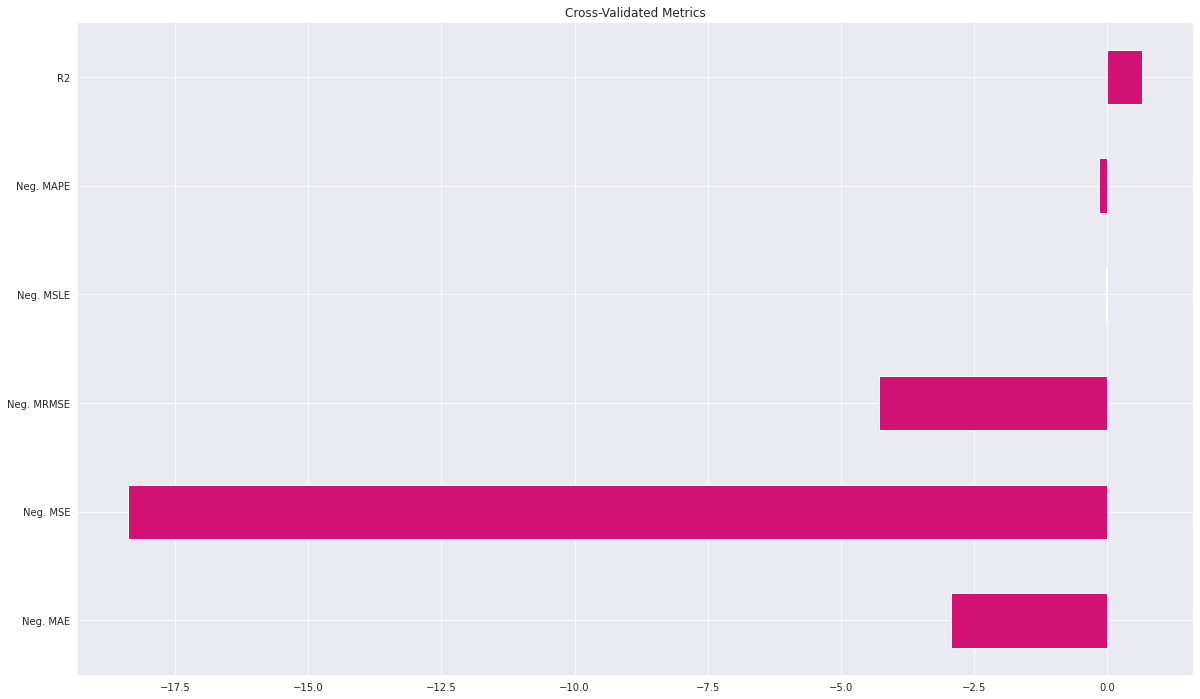

In [276]:
# RandomForestRegression Model classification report using RandomizedSearchCV parameters
cv_metrics = neg_scoring_classification_report(rfr)
ax = cv_metrics.T.plot.barh(title="Cross-Validated Metrics", legend=False, color = '#d11174');
fig = ax.get_figure()
fig.set_size_inches(20, 12)

In [269]:
# creating a RandomForestRegressor model using the hyperparameter listed by HalvingGridSearchCV
rfr = RandomForestRegressor(max_depth = None, max_features = 0.5, min_samples_leaf =  1, min_samples_split = 4)

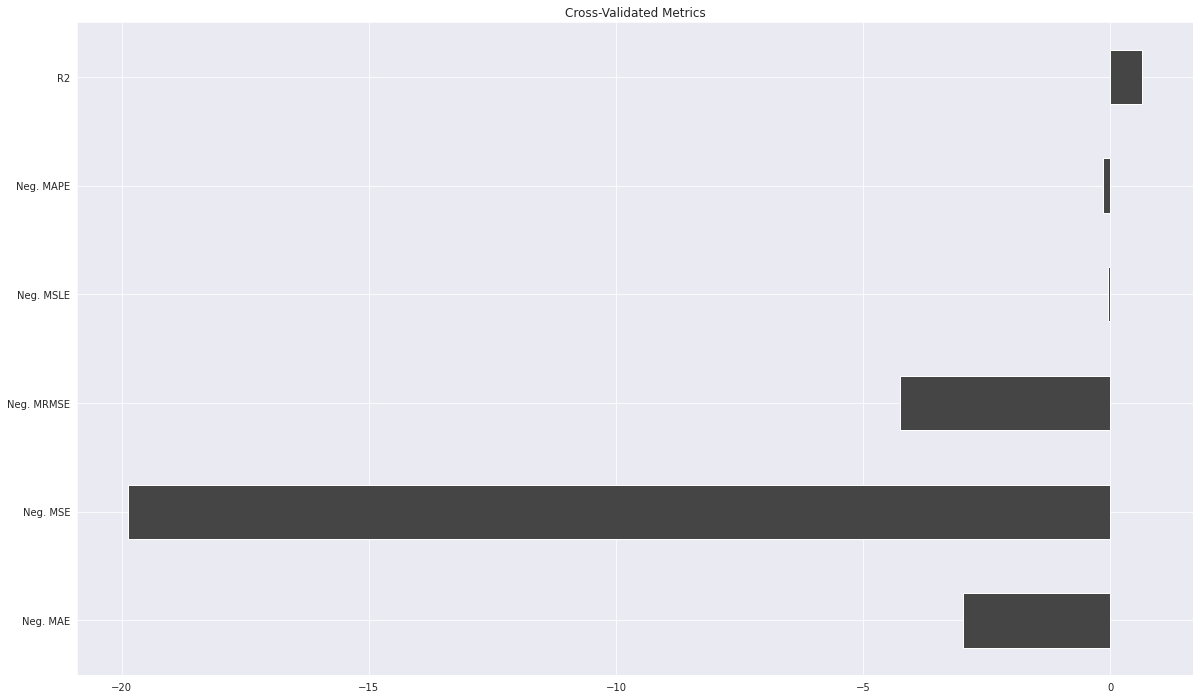

In [278]:
# RandomForestRegression Model classification report using HalvingGridSearchCV parameters
cv_metrics = neg_scoring_classification_report(rfr)
ax = cv_metrics.T.plot.barh(title="Cross-Validated Metrics", legend=False, color = '#454545');
fig = ax.get_figure()
fig.set_size_inches(20, 12)

---

## **Feature importance**
Feature importance is another way of asking, "which features contributing most to the outcomes of the model?"

Unlike some of the other functions we've seen, because how each model finds patterns in data is slightly different, how a model judges how important those patterns are is different as well. This means for each model, there's a slightly different way of finding which features were most important.

**The larger the value (bigger bar), the more the feature contributes to the models decision.**

In [199]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    plt.figure(figsize = (16,12))
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

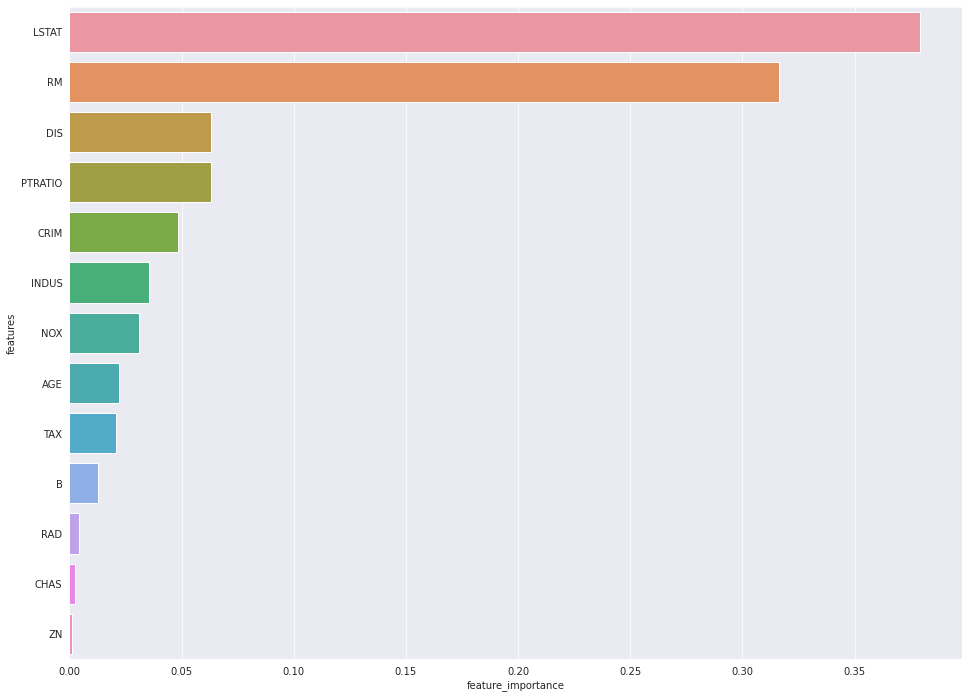

In [200]:
plot_features(X_train.columns, gs_rfr.feature_importances_)

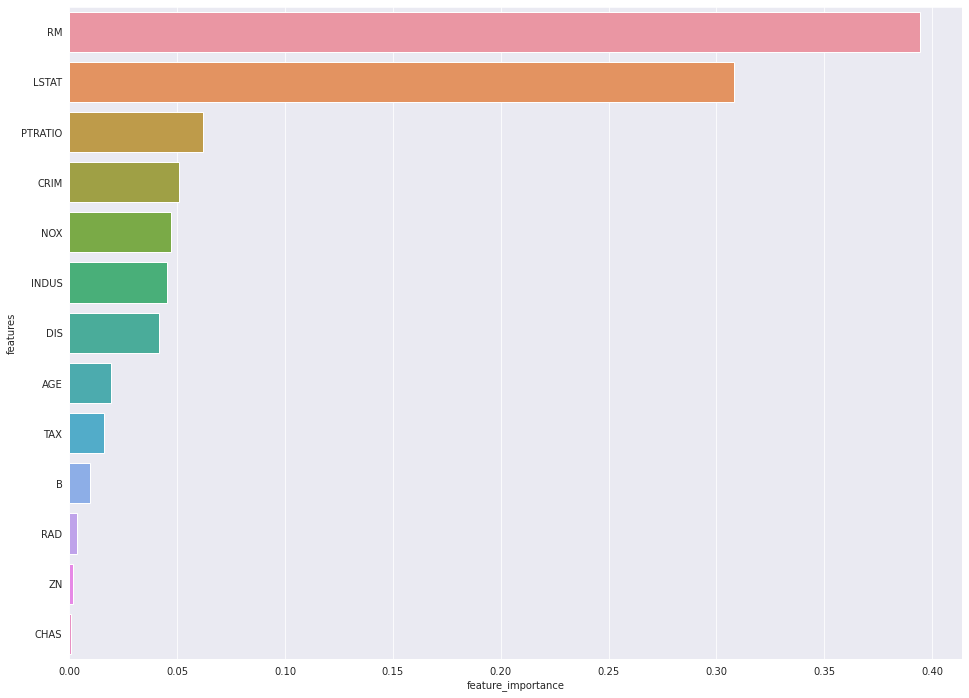

In [201]:
plot_features(X_train.columns, rs_rfr.feature_importances_)

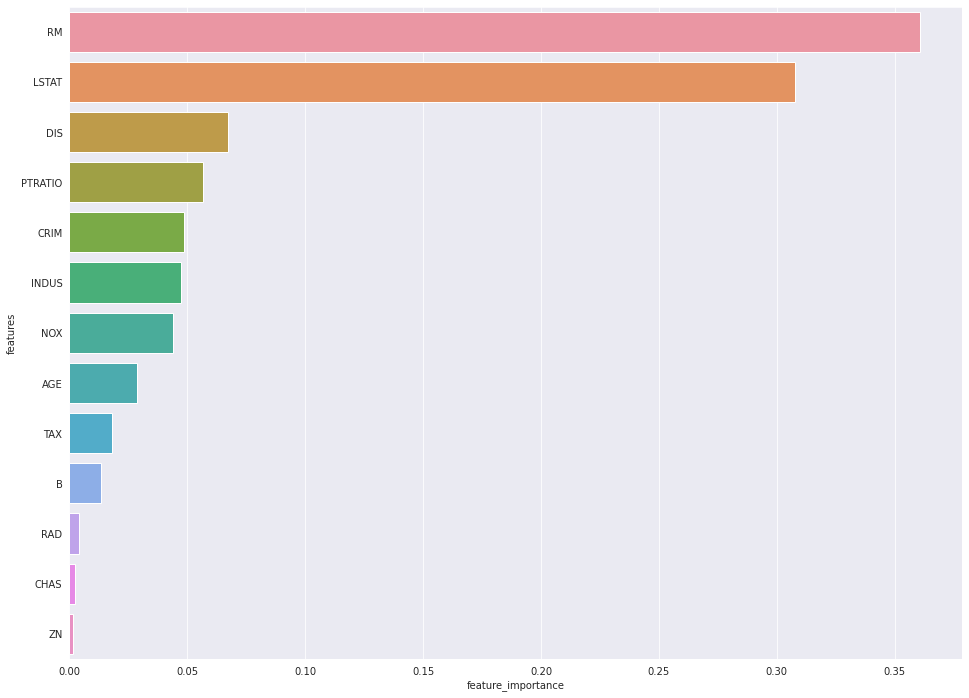

In [202]:
plot_features(X_train.columns, hs_rfr.feature_importances_)

---

## **Comparing Model Prediction**

In this topic we're gonna take a visualy comparison between the expected values showed in the **boston housing** data set against the predictions made.

In [284]:
from matplotlib.lines import Line2D

In [288]:
def histkde_comparsion_graph(model, y_preds):
  variables = [y_preds, np.array(y_valid)]

  custom = [Line2D([], [], marker='.', color='#536d88', linestyle='None'),
            Line2D([], [], marker='.', color='#ffb884', linestyle='None')]

  fig, axs = plt.subplots(ncols = 2, figsize = (24,12))
  fig.suptitle('A Histogram and KDE graph for comparsion between the actual values and the pred values', fontsize = 18);

  sns.histplot(data = variables, ax = axs[0])
  axs[0].set(title = f'Target distribution comparison ({model} Model)');
  sns.kdeplot(data = variables, shade = True ,ax = axs[1])
  axs[1].set(title = f'Target density comparison ({model} Model)');


  for col in range(2):
    axs[col].legend(custom, [model, 'Boston Data Set', ],loc = 'upper right');

In [295]:
#Comparing the RandomForestRegressor Model predictions
rfr = RandomForestRegressor(max_depth = None, max_features = 0.5, min_samples_leaf = 1, min_samples_split = 2)
rfr.fit(X_train, y_train)
rfr_reds = rfr.predict(X_valid)

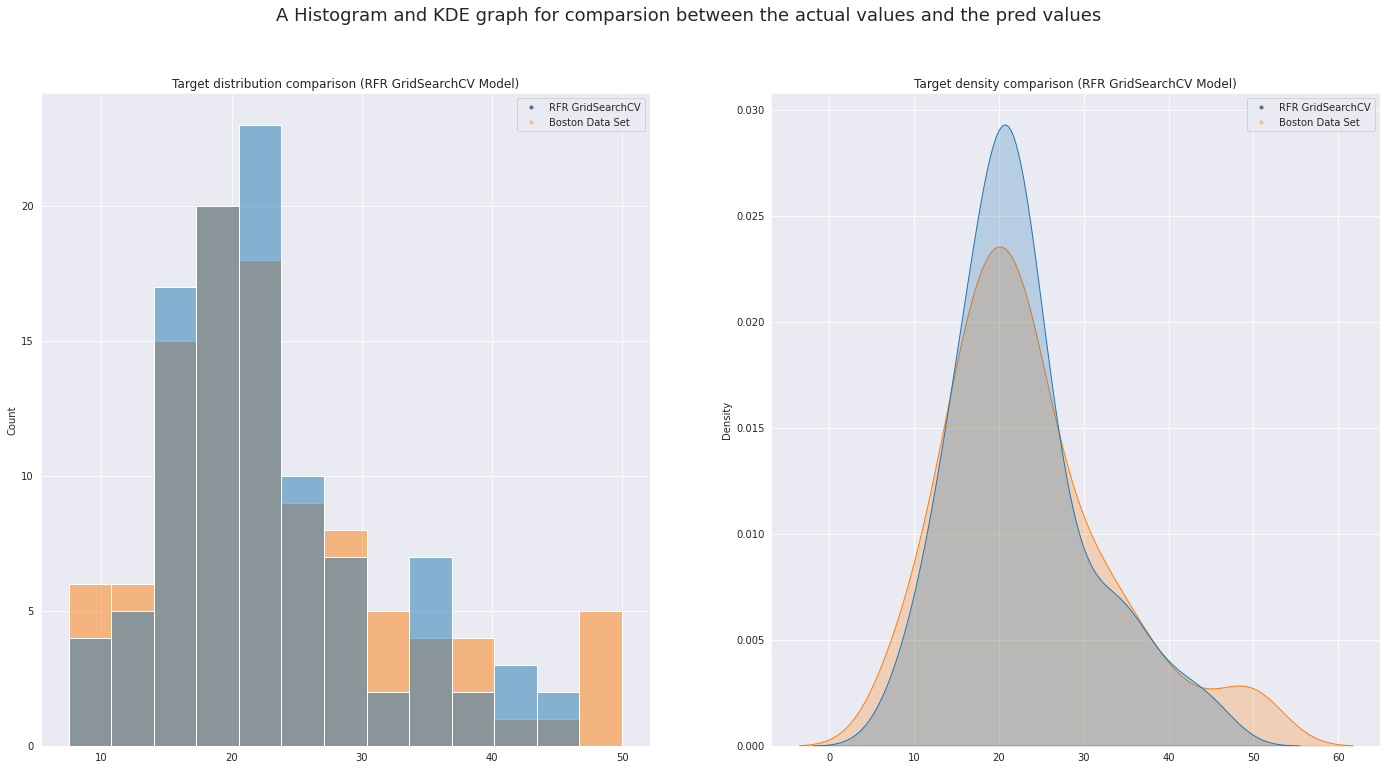

In [296]:
histkde_comparsion_graph('RFR GridSearchCV', rfr_reds)

In [297]:
#Comparing the RandomForestRegressor Model predictions
rfr = RandomForestRegressor(max_depth = 10, max_features = 0.5, min_samples_leaf =  3, min_samples_split = 12)
rfr.fit(X_train, y_train)
rfr_reds = rfr.predict(X_valid)

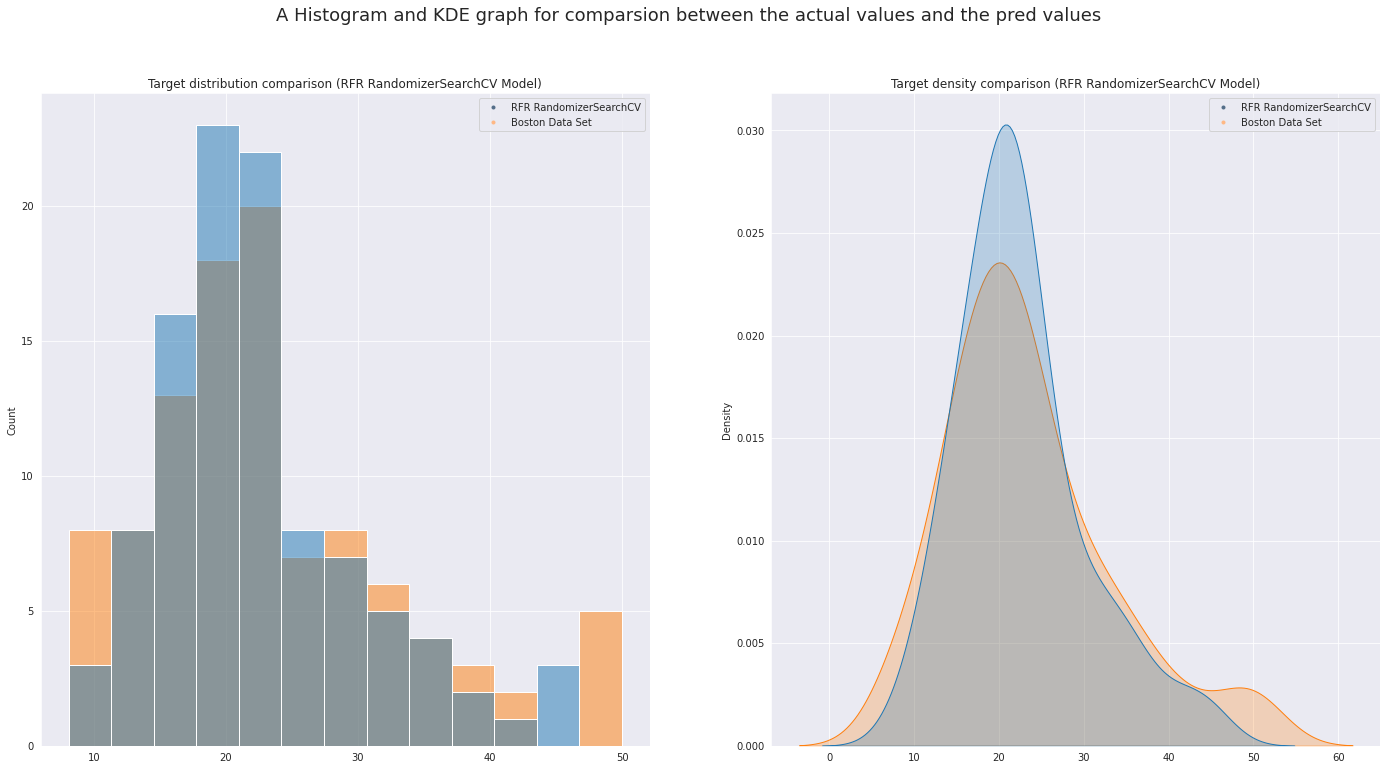

In [298]:
histkde_comparsion_graph('RFR RandomizerSearchCV', rfr_reds)

In [299]:
#Comparing the RandomForestRegressor Model predictions
rfr = RandomForestRegressor(max_depth = None, max_features = 0.5, min_samples_leaf =  1, min_samples_split = 4)
rfr.fit(X_train, y_train)
rfr_reds = rfr.predict(X_valid)

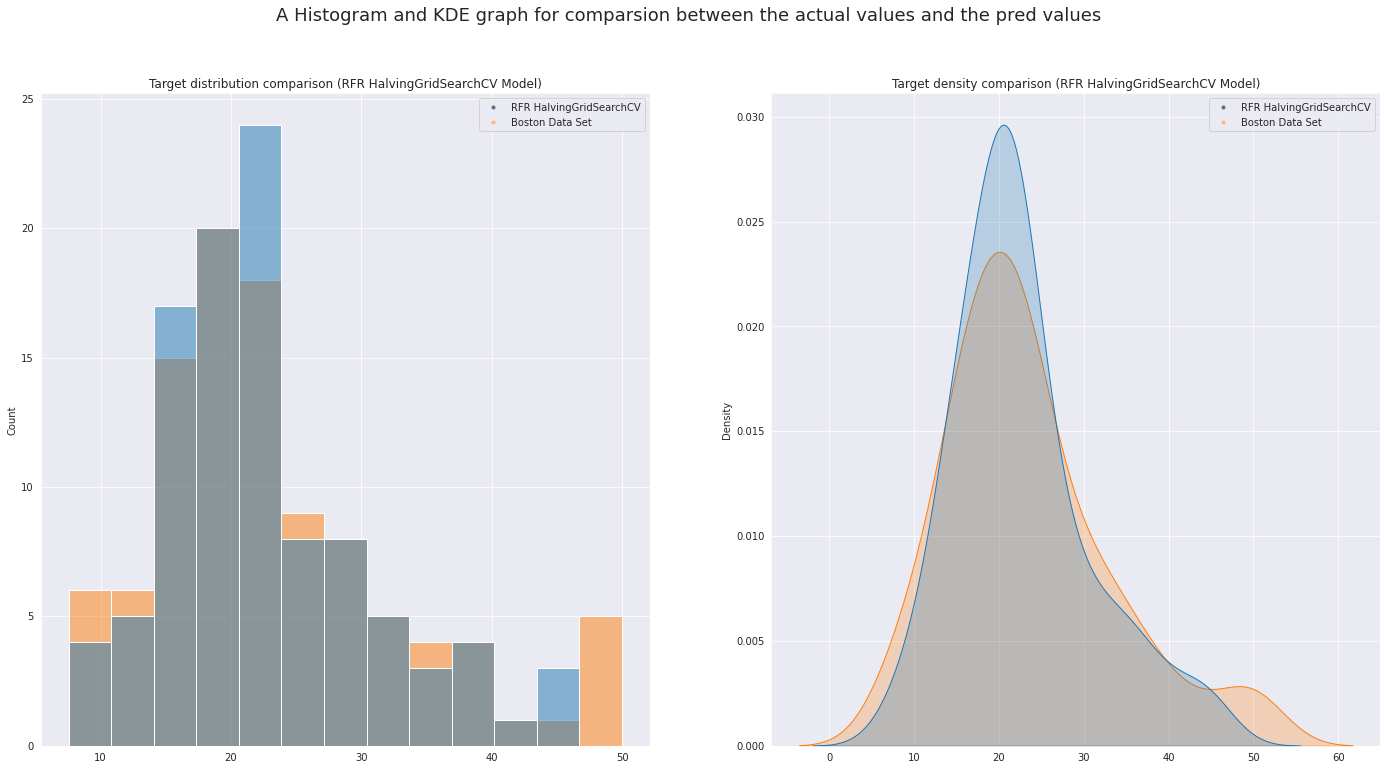

In [300]:
histkde_comparsion_graph('RFR HalvingGridSearchCV', rfr_reds)